ANALISIS EXPLORATORIO DE DATOS

In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk
from wordcloud import WordCloud
import warnings

warnings.filterwarnings("ignore")

In [41]:
df = pd.read_parquet("DataSet_Final.parquet")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6452301 entries, 0 to 6452300
Data columns (total 20 columns):
 #   Column            Dtype         
---  ------            -----         
 0   user_id           object        
 1   items_count       int64         
 2   steam_id          object        
 3   item_id_x         float64       
 4   item_name         object        
 5   playtime_forever  float64       
 6   playtime_2weeks   float64       
 7   reviews           object        
 8   item_id           float64       
 9   recommend         bool          
 10  review            object        
 11  sentiment_score   int64         
 12  publisher         object        
 13  genres            object        
 14  title             object        
 15  release_date      object        
 16  tags              object        
 17  price             float64       
 18  developer         object        
 19  anio              datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(5), int

In [43]:
df.head(5)

,user_id,items_count,steam_id,item_id_x,item_name,playtime_forever,playtime_2weeks,reviews,item_id,recommend,review,sentiment_score,publisher,genres,title,release_date,tags,price,developer,anio
0,76561197970982479,277,76561197970982479,10.0,Counter-Strike,6.0,0.0,"{'funny': '', 'helpful': 'No ratings yet', 'it...",1250.0,True,Simple yet with great replayability. In my opi...,2,Tripwire Interactive,Action,Killing Floor,2009-05-14,"[FPS, Zombies, Co-op, Survival, Action, Multip...",19.99,Tripwire Interactive,2009-05-14
1,76561197970982479,277,76561197970982479,10.0,Counter-Strike,6.0,0.0,"{'funny': '', 'helpful': 'No ratings yet', 'it...",22200.0,True,It's unique and worth a playthrough.,2,ACE Team,Action Indie,Zeno Clash,2009-04-21,"[Action, Indie, Surreal, Beat 'em up, FPS, Fig...",9.99,ACE Team,2009-04-21
2,76561197970982479,277,76561197970982479,20.0,Team Fortress Classic,0.0,0.0,"{'funny': '', 'helpful': 'No ratings yet', 'it...",1250.0,True,Simple yet with great replayability. In my opi...,2,Tripwire Interactive,Action,Killing Floor,2009-05-14,"[FPS, Zombies, Co-op, Survival, Action, Multip...",19.99,Tripwire Interactive,2009-05-14
3,76561197970982479,277,76561197970982479,20.0,Team Fortress Classic,0.0,0.0,"{'funny': '', 'helpful': 'No ratings yet', 'it...",22200.0,True,It's unique and worth a playthrough.,2,ACE Team,Action Indie,Zeno Clash,2009-04-21,"[Action, Indie, Surreal, Beat 'em up, FPS, Fig...",9.99,ACE Team,2009-04-21
4,76561197970982479,277,76561197970982479,30.0,Day of Defeat,7.0,0.0,"{'funny': '', 'helpful': 'No ratings yet', 'it...",1250.0,True,Simple yet with great replayability. In my opi...,2,Tripwire Interactive,Action,Killing Floor,2009-05-14,"[FPS, Zombies, Co-op, Survival, Action, Multip...",19.99,Tripwire Interactive,2009-05-14


In [49]:
df['año'] = df['anio'].dt.year

In [50]:
df.head(1)

,user_id,items_count,steam_id,item_id_x,item_name,playtime_forever,playtime_2weeks,reviews,item_id,recommend,...,sentiment_score,publisher,genres,title,release_date,tags,price,developer,anio,año
0,76561197970982479,277,76561197970982479,10.0,Counter-Strike,6.0,0.0,"{'funny': '', 'helpful': 'No ratings yet', 'it...",1250.0,True,...,2,Tripwire Interactive,Action,Killing Floor,2009-05-14,"[FPS, Zombies, Co-op, Survival, Action, Multip...",19.99,Tripwire Interactive,2009-05-14,2009.0


In [44]:
df.describe()

,items_count,item_id_x,playtime_forever,playtime_2weeks,item_id,sentiment_score,price,anio
count,6.452301e+06,6.446987e+06,6.446987e+06,6.446987e+06,6.452301e+06,6.452301e+06,6.452301e+06,6430002
mean,5.116609e+02,1.923055e+05,8.822028e+02,8.875715e+00,1.852656e+05,1.654051e+00,1.454362e+01,2012-09-30 14:47:41.310465792
min,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,1989-01-01 00:00:00
25%,1.130000e+02,4.170000e+04,0.000000e+00,0.000000e+00,3.490000e+04,2.000000e+00,4.990000e+00,2011-08-16 00:00:00
50%,2.050000e+02,2.219100e+05,3.200000e+01,0.000000e+00,2.211000e+05,2.000000e+00,1.299000e+01,2013-06-25 00:00:00
75%,4.120000e+02,2.877000e+05,3.000000e+02,0.000000e+00,2.715900e+05,2.000000e+00,1.999000e+01,2014-12-11 00:00:00
max,7.762000e+03,5.307200e+05,6.427730e+05,1.996700e+04,5.273400e+05,2.000000e+00,7.717100e+02,2017-12-25 00:00:00
std,1.053701e+03,1.342111e+05,5.232618e+03,1.403847e+02,1.302536e+05,7.562103e-01,1.410012e+01,NaN


Mapa de correlacion

Intentare a continuacion realizar un heatmap, buscando algun tipo de relacion directa entre las variables numericas

In [52]:
df_num= df.select_dtypes(include = (int,float))

<Axes: >

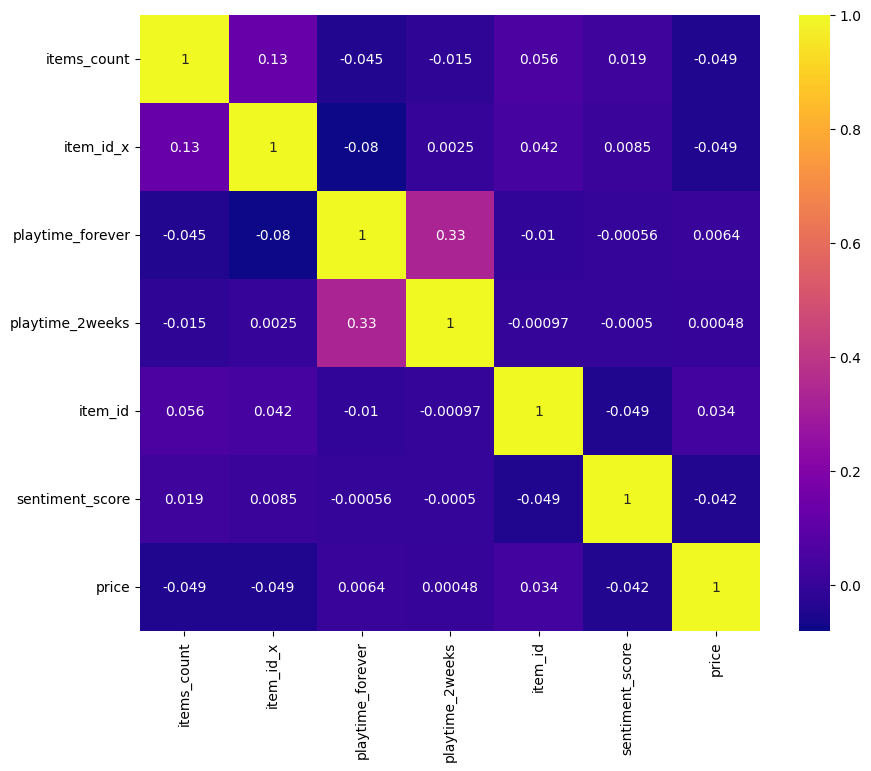

In [51]:
#Creamos una matriz de correlación
corr_matrix = df_num.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='plasma')



Conclusiones: no hay realmente una correlacion entre los elementos, cada columna pertenece a su propia categoria

Top juegos

El top de juegos con reviews entre usuarios de nuestro dataset

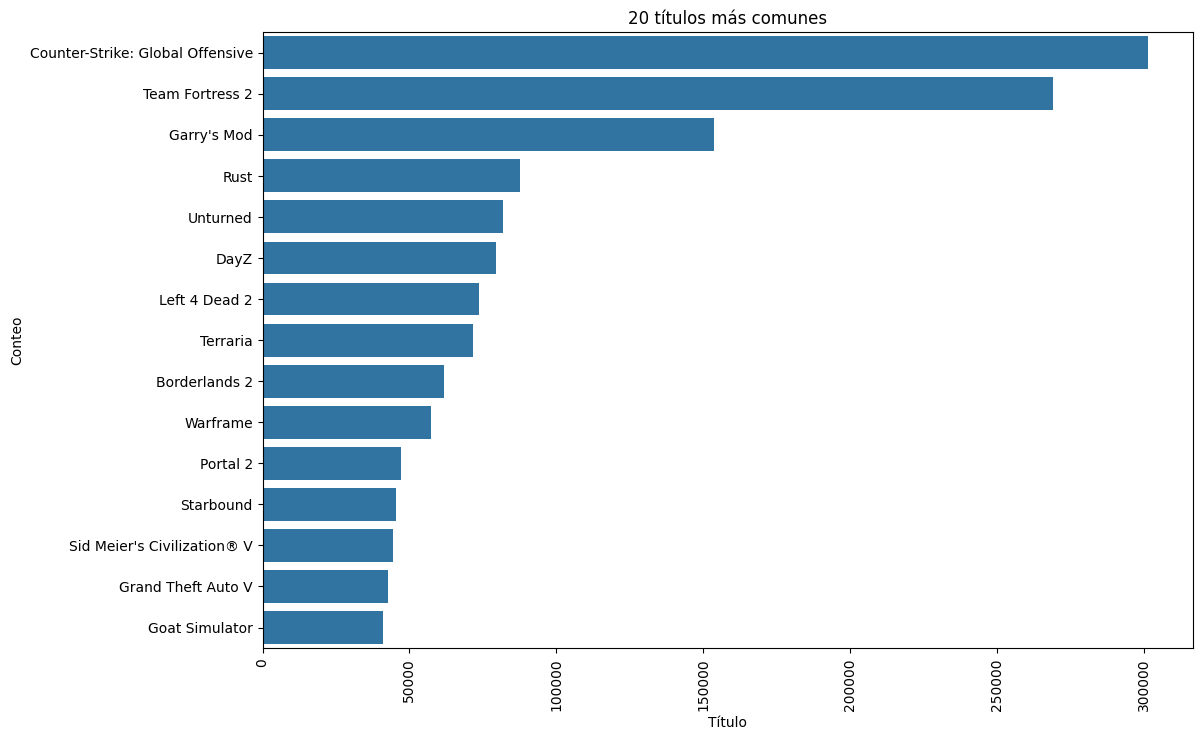

In [37]:
# Obtener los 20 títulos más comunes
top_titles = df['title'].value_counts().nlargest(15)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(y=top_titles.index, x=top_titles.values)
plt.xlabel('Título')
plt.ylabel('Conteo')
plt.title('20 títulos más comunes')
plt.xticks(rotation=90)
plt.show()


Concluciones: El mayor porcentaje lo tienen Garry's Mod, Counter Strike, Team Fortress, los cuales serian los juegos mas comprados segun los usuarios


Dispersion de horas de juego vs Años

un chequeo general para mostrar explicitamente los años que tuvieron la mayor cantidad de horas de juego para cada usuario

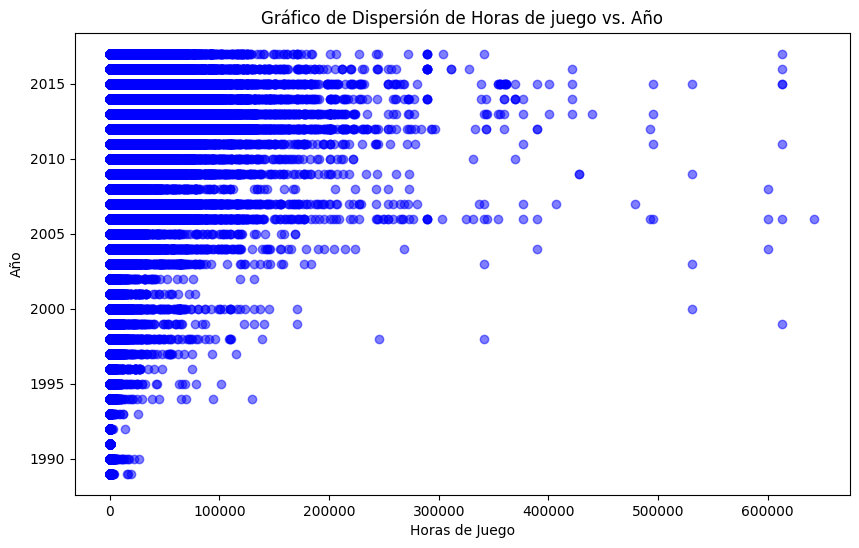

In [53]:
plt.figure(figsize=(10, 6))


plt.scatter(df_num['playtime_forever'], df_num['año'], color='blue', alpha=0.5)

# Personaliza el gráfico con etiquetas y título
plt.title('Gráfico de Dispersión de Horas de juego vs. Año')
plt.xlabel('Horas de Juego')
plt.ylabel('Año');

Grafico de Barras Sentiment score por año de publicacion 

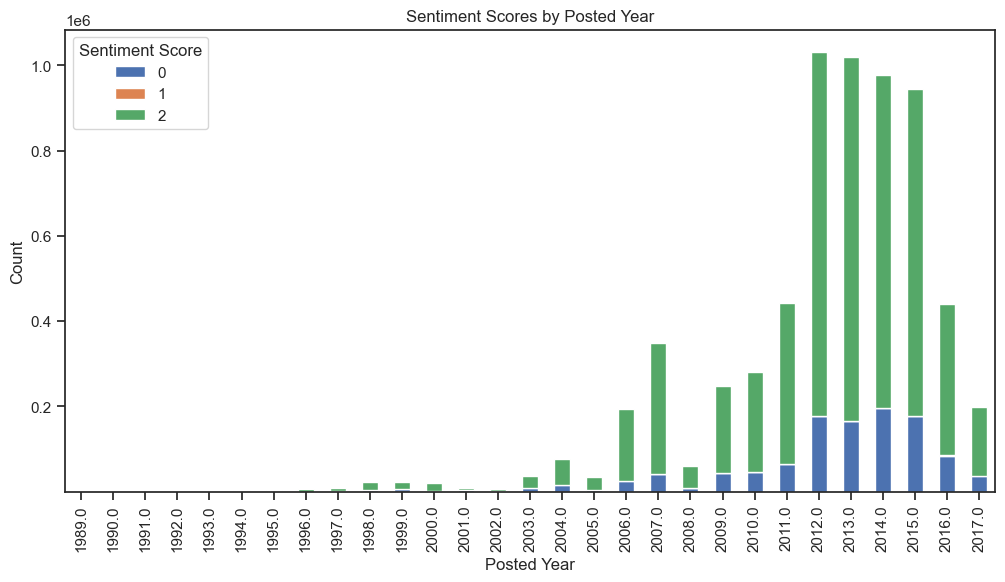

In [60]:
# Group the data by 'posted year' and 'sentiment_score' and count the occurrences
grouped_data = df.groupby(['año', 'sentiment_score']).size().reset_index(name='count')

# Pivot the data to have 'sentiment_score' as columns
pivot_data = grouped_data.pivot(index='año', columns='sentiment_score', values='count')

# Plot the grouped data
sns.set(style='ticks')
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Posted Year')
plt.ylabel('Count')
plt.title('Sentiment Scores by Posted Year')
plt.legend(title='Sentiment Score', loc='upper left')
plt.show()